**Tujuan Bisnis**

Heart Disease
Cardiovascular desease (CVD) atau penyakit kardiovaskuler merupakan salah satu penyebab kematian nomor satu secara global. Diestimasikan telah merenggut nyawa sekitar 18 juta jiwa setiap tahunnya atau 31% dari seluruh
penyebab kematian secara global. Empat dari lima kematian CVD diakibatkan oleh serangan jantung dan stroke,
dan sepertiganya dialami secara prematur oleh sesorang dengan usia di bawah 70 tahun.
Kegagalan jantung merupakan salah salah penyebab umum dari penyakit kardiovaskuler. Sebagai seorang
associate data scientist, Anda ditugaskan untuk melakukan prediksi terhadap kemungkinan terjadinya penyakit
jantung. Diharapkan pemodelan yang dihasilkan dapat membantu kinerja dokter dalam mendeteksi pasien dengan
penyakit jantung, sehingga dapat menolong lebih banyak orang yang berisiko tinggi terkena penyakit
kardiovaskuler.

IMPORT LIBRARY

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dataset bnsp/heart (1).csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.shape

(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
cor = data[["Age",'Sex','ChestPainType' , 'RestingBP','Cholesterol','FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']].corr()
cor

<ipython-input-7-f007ec990931>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data[["Age",'Sex','ChestPainType' , 'RestingBP','Cholesterol','FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']].corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.210568,-0.062391,0.127287,-0.300843,0.196534,0.212565
RestingBP,0.210568,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.062391,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.127287,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.300843,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.196534,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.212565,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<Axes: >

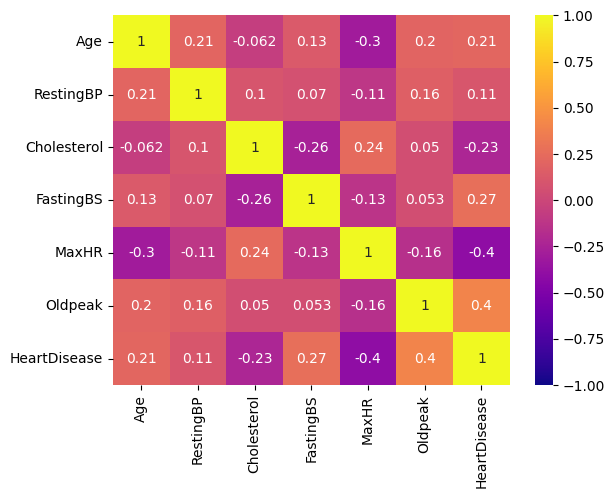

In [ ]:
sns.heatmap(cor, annot=True,cmap= "plasma", vmin=-1,vmax=1)

In [ ]:
data.nunique()

Age                57
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [ ]:
#memeriksa konsisten data
print(data['ChestPainType'].unique())
print(data['Sex'].unique())
print(data['RestingECG'].unique())
print(data['ExerciseAngina'].unique())
print(data['ST_Slope'].unique())
print(data['Age'].unique())
print(data['Cholesterol'].unique())
print(data['FastingBS'].unique())
print(data['HeartDisease'].unique())
print(data['MaxHR'].unique())
print(data['Oldpeak'].unique())
print(data['RestingBP'].unique())

['ATA' 'NAP' 'ASY' 'TA']
['M' 'F' nan]
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']
[ nan  49.  37.  48.  54.  39.  45.  58.  42.  38.  43.  60.  36.  44.
  40.  53.  52.  51.  56.  41.  32.  65.  35.  59.  50.  47.  31.  46.
  57. 155.  55.  63.  66.  34.  33.  61.  29.  62.  28.  30.  74.  68.
   0.  72.  64.  69.  67.  73.  70. 161. 177.  75.  76.  71. 153. 170.
 154.  77.]
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 226 217 303 298 256 117 295 173 315 281 309 200
 336 355 326 171 491 271 274

In [ ]:
data['Oldpeak'] = data['Oldpeak'].astype('int64')

In [ ]:
data['FastingBS'] = data['FastingBS'].astype('object', copy=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    int64  
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,M,TA,110,264,0,Normal,132,N,1,Flat,1
914,68.0,M,ASY,144,193,1,Normal,141,N,3,Flat,1
915,57.0,M,ASY,130,131,0,Normal,115,Y,1,Flat,1
916,57.0,F,ATA,130,236,0,LVH,174,N,0,Flat,1


In [ ]:
for column in data.select_dtypes(include='number'):
    stat, p = stats.shapiro(data[column])
    print(f"Kolom '{column}': Statistik={stat}, p-value={p}")

    alpha = 0.05
    if p > alpha:
        print(f"Sample pada kolom '{column}' terdistribusi normal (tidak dapat menolak H0)")
    else:
        print(f"Sample pada kolom '{column}' tidak terdistribusi normal (menolak H0)")

Kolom 'Age': Statistik=nan, p-value=1.0
Sample pada kolom 'Age' terdistribusi normal (tidak dapat menolak H0)
Kolom 'RestingBP': Statistik=0.9580429196357727, p-value=1.494997270036079e-15
Sample pada kolom 'RestingBP' tidak terdistribusi normal (menolak H0)
Kolom 'Cholesterol': Statistik=0.8705925941467285, p-value=6.972955704658339e-27
Sample pada kolom 'Cholesterol' tidak terdistribusi normal (menolak H0)
Kolom 'MaxHR': Statistik=0.9926717877388, p-value=0.0001683219597907737
Sample pada kolom 'MaxHR' tidak terdistribusi normal (menolak H0)
Kolom 'Oldpeak': Statistik=0.7684177160263062, p-value=4.853598725800955e-34
Sample pada kolom 'Oldpeak' tidak terdistribusi normal (menolak H0)
Kolom 'HeartDisease': Statistik=0.6324208974838257, p-value=2.3473991354983606e-40
Sample pada kolom 'HeartDisease' tidak terdistribusi normal (menolak H0)


In [ ]:
print(data.isnull().sum())

Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64


In [ ]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [ ]:
data['Age'] = data['Age'].astype('int64')

In [ ]:
data['Sex'].fillna(data['Sex'].mode()[0], inplace = True)

In [ ]:
print(data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             918 non-null    int64 
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   RestingBP       918 non-null    int64 
 4   Cholesterol     918 non-null    int64 
 5   FastingBS       918 non-null    object
 6   RestingECG      918 non-null    object
 7   MaxHR           918 non-null    int64 
 8   ExerciseAngina  918 non-null    object
 9   Oldpeak         918 non-null    int64 
 10  ST_Slope        918 non-null    object
 11  HeartDisease    918 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 86.2+ KB


In [ ]:
#memeriksa konsisten data
print(data['ChestPainType'].unique())
print(data['Sex'].unique())
print(data['RestingECG'].unique())
print(data['ExerciseAngina'].unique())
print(data['ST_Slope'].unique())
print(data['Age'].unique())
print(data['Cholesterol'].unique())
print(data['FastingBS'].unique())
print(data['HeartDisease'].unique())
print(data['MaxHR'].unique())
print(data['Oldpeak'].unique())
print(data['RestingBP'].unique())

['ATA' 'NAP' 'ASY' 'TA']
['M' 'F']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']
[ 54  49  37  48  39  45  58  42  38  43  60  36  44  40  53  52  51  56
  41  32  65  35  59  50  47  31  46  57 155  55  63  66  34  33  61  29
  62  28  30  74  68   0  72  64  69  67  73  70 161 177  75  76  71 153
 170 154  77]
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 187 266 287 404 312 251 328 285 280
 192 193 308 219 257 132 226 217 303 298 256 117 295 173 315 281 309 200
 336 355 326 171 491 271 274 394 221 126 305 220 242 347 344 358 169 181
   0 236 203 153 316 3

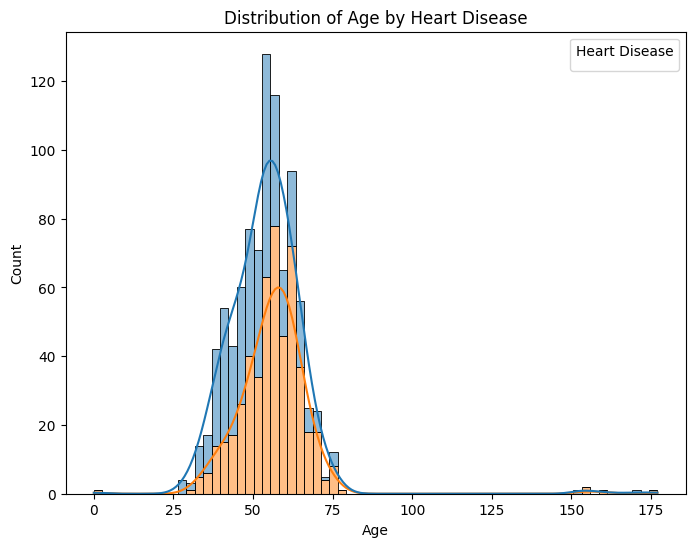

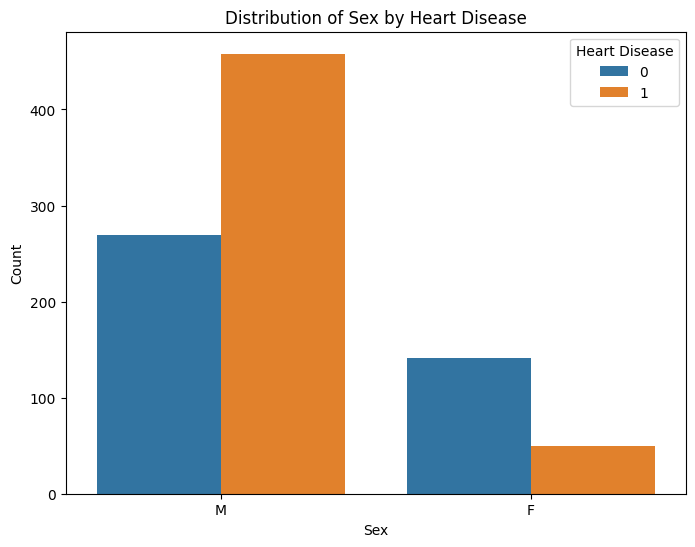

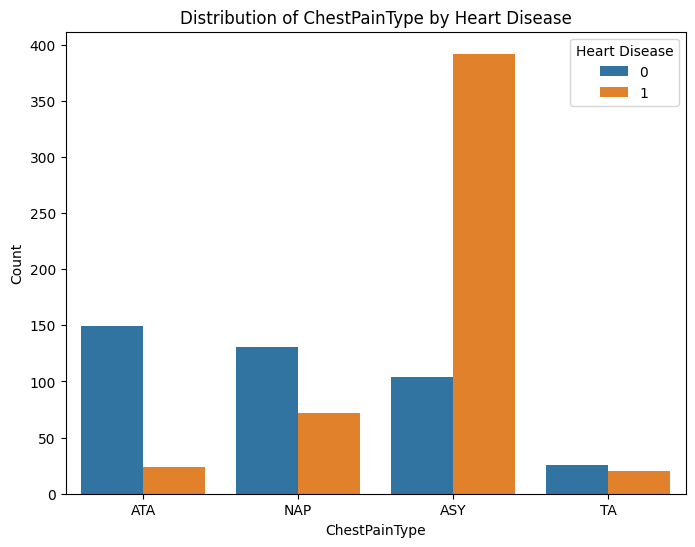

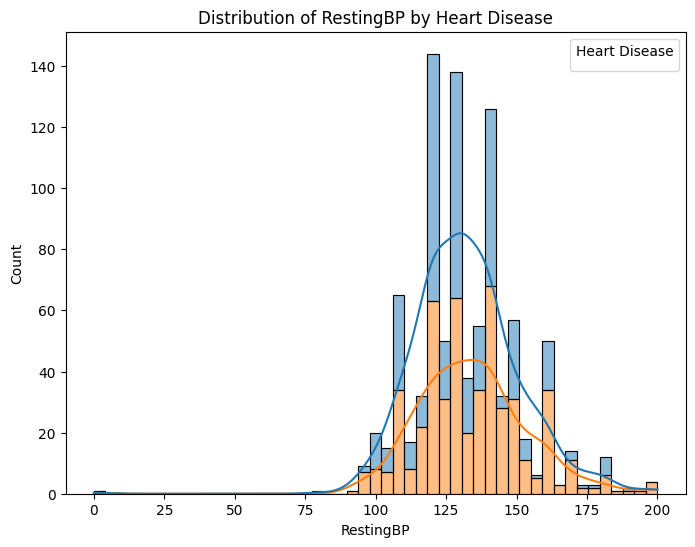

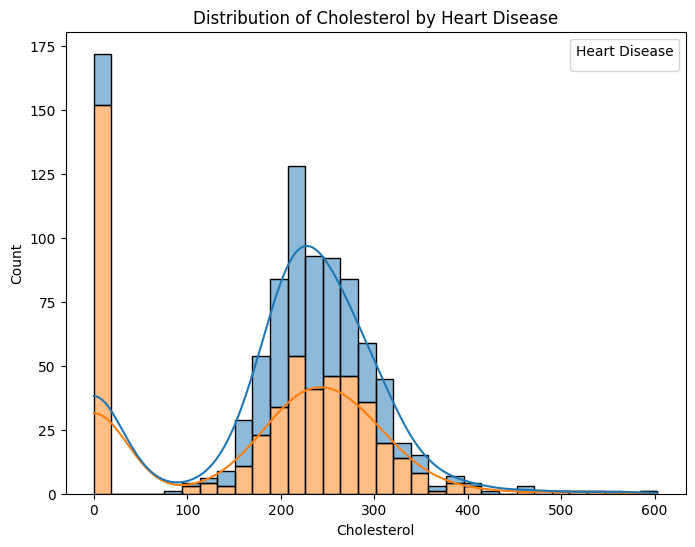

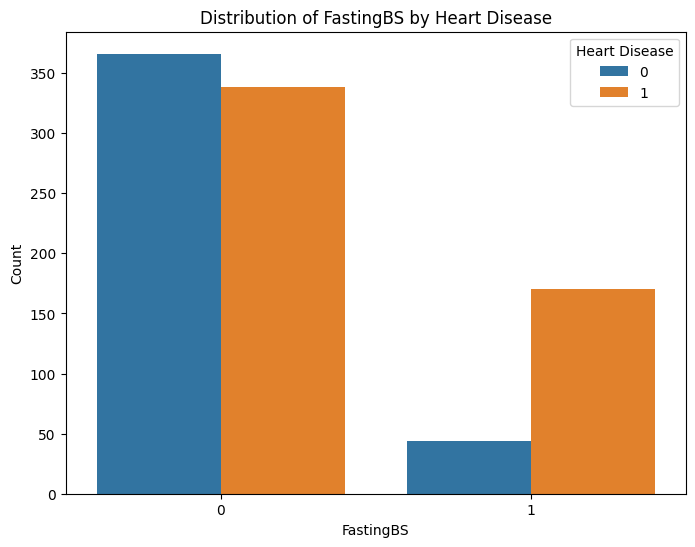

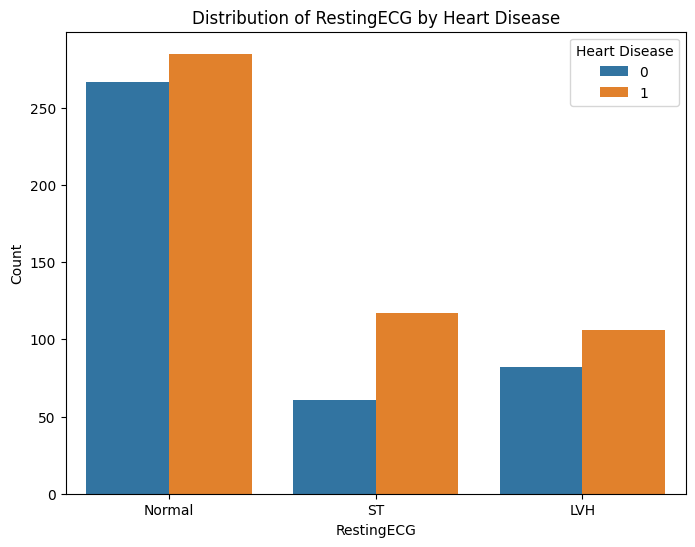

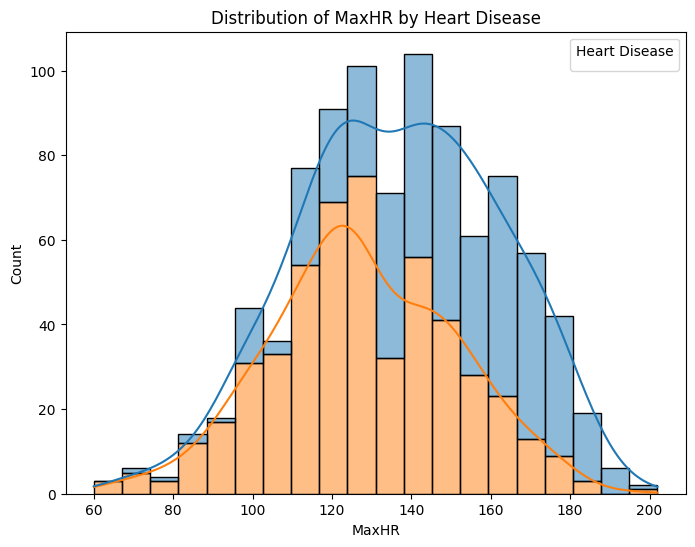

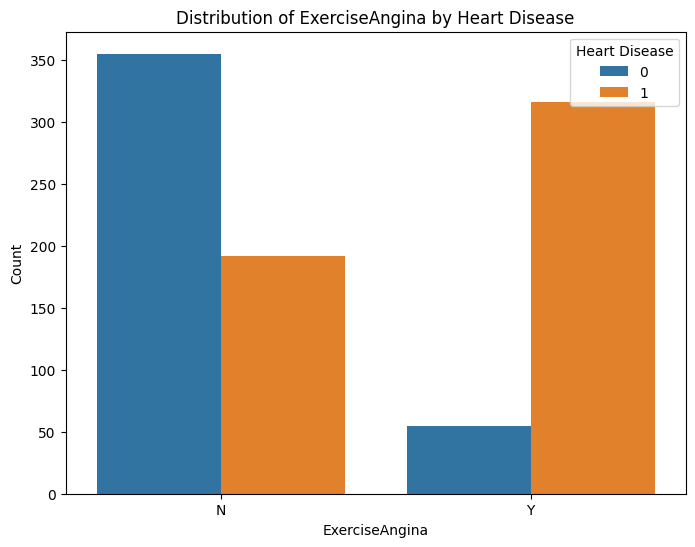

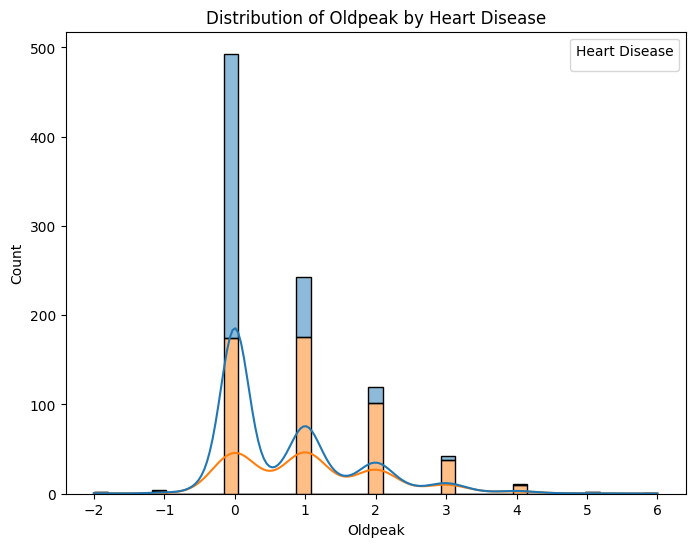

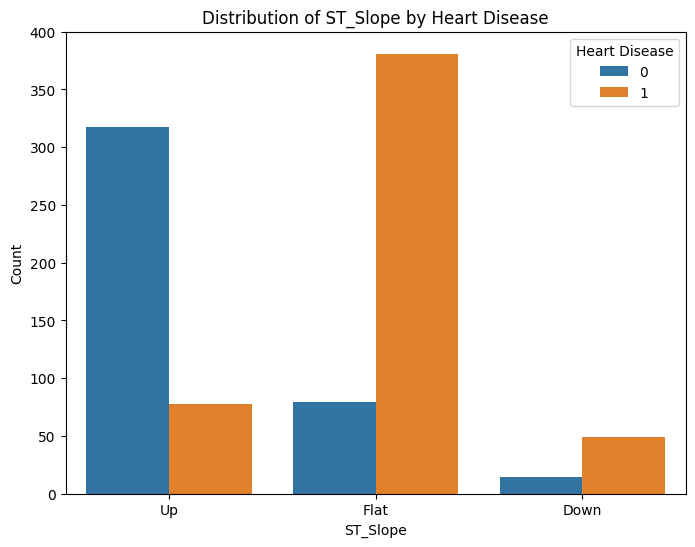

In [ ]:
for column in data.columns.drop('HeartDisease'):
    # Periksa tipe data kolom: jika numerik, gunakan histogram, jika kategorikal, gunakan count plot
    if data[column].dtype == 'object':
        plt.figure(figsize=(8, 6))
        sns.countplot(data=data, x=column, hue='HeartDisease')
        plt.title(f'Distribution of {column} by Heart Disease')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Heart Disease', loc='upper right')
        plt.savefig(f'{column}_distribution.jpg')
        plt.show()
    else:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=data, x=column, hue='HeartDisease', kde=True, multiple='stack')
        plt.title(f'Distribution of {column} by Heart Disease')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Heart Disease', loc='upper right')
        plt.savefig(f'{column}_distribution.jpg')
        plt.show()

DETECT OUTLIERS

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age             13.00
RestingBP       20.00
Cholesterol     93.75
MaxHR           36.00
Oldpeak          1.00
HeartDisease     1.00
dtype: float64


<ipython-input-28-3fa956ee7617>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-28-3fa956ee7617>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)


In [ ]:
outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-29-51e5135a8d9b>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 19 to 914
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             255 non-null    int64 
 1   Sex             255 non-null    object
 2   ChestPainType   255 non-null    object
 3   RestingBP       255 non-null    int64 
 4   Cholesterol     255 non-null    int64 
 5   FastingBS       255 non-null    object
 6   RestingECG      255 non-null    object
 7   MaxHR           255 non-null    int64 
 8   ExerciseAngina  255 non-null    object
 9   Oldpeak         255 non-null    int64 
 10  ST_Slope        255 non-null    object
 11  HeartDisease    255 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 25.9+ KB


In [ ]:
df_clean = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             663 non-null    int64 
 1   Sex             663 non-null    object
 2   ChestPainType   663 non-null    object
 3   RestingBP       663 non-null    int64 
 4   Cholesterol     663 non-null    int64 
 5   FastingBS       663 non-null    object
 6   RestingECG      663 non-null    object
 7   MaxHR           663 non-null    int64 
 8   ExerciseAngina  663 non-null    object
 9   Oldpeak         663 non-null    int64 
 10  ST_Slope        663 non-null    object
 11  HeartDisease    663 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 67.3+ KB


<ipython-input-31-ff4e22379d1d>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_clean = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
df_clean

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ATA,140,289,0,Normal,172,N,0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0,Flat,1


In [ ]:
target_correlation = df_clean.corr()['HeartDisease'].sort_values(ascending=False)
target_correlation

<ipython-input-33-2b431397fe3c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  target_correlation = df_clean.corr()['HeartDisease'].sort_values(ascending=False)


HeartDisease    1.000000
Oldpeak         0.460517
Age             0.296554
RestingBP       0.152447
Cholesterol     0.102310
MaxHR          -0.398531
Name: HeartDisease, dtype: float64

In [ ]:
#Transform data One Hot Encoding
def one_hot_encoding(df_clean, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df_clean[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df_clean = pd.concat([df_clean.drop(column_name, axis=1), dummies], axis=1)

    return df_clean
df_clean = one_hot_encoding(df_clean, 'Sex')
df_clean = one_hot_encoding(df_clean, 'RestingECG')
df_clean = one_hot_encoding(df_clean, 'ExerciseAngina')
df_clean = one_hot_encoding(df_clean, 'ST_Slope')
df_clean = one_hot_encoding(df_clean, 'ChestPainType')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                663 non-null    int64 
 1   RestingBP          663 non-null    int64 
 2   Cholesterol        663 non-null    int64 
 3   FastingBS          663 non-null    object
 4   MaxHR              663 non-null    int64 
 5   Oldpeak            663 non-null    int64 
 6   HeartDisease       663 non-null    int64 
 7   Sex_F              663 non-null    uint8 
 8   Sex_M              663 non-null    uint8 
 9   RestingECG_LVH     663 non-null    uint8 
 10  RestingECG_Normal  663 non-null    uint8 
 11  RestingECG_ST      663 non-null    uint8 
 12  ExerciseAngina_N   663 non-null    uint8 
 13  ExerciseAngina_Y   663 non-null    uint8 
 14  ST_Slope_Down      663 non-null    uint8 
 15  ST_Slope_Flat      663 non-null    uint8 
 16  ST_Slope_Up        663 non-null    uint8 
 1

EDA

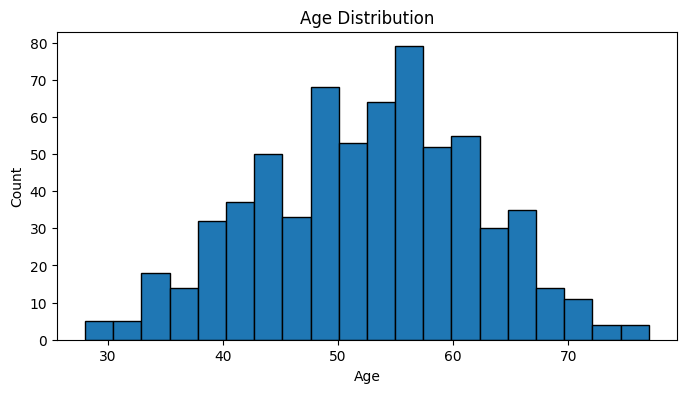

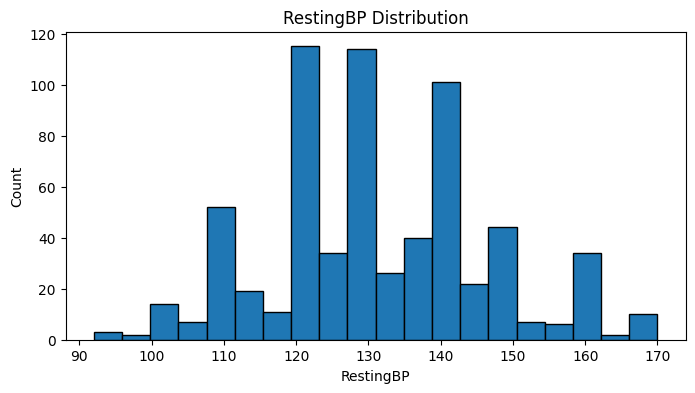

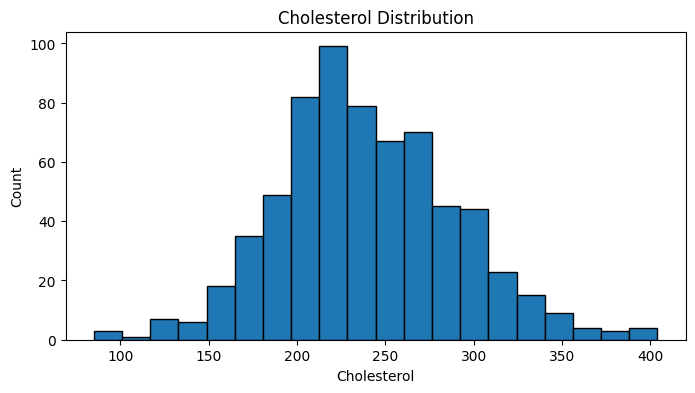

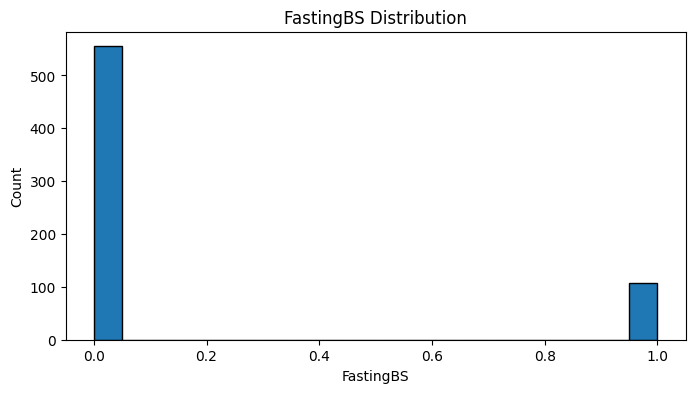

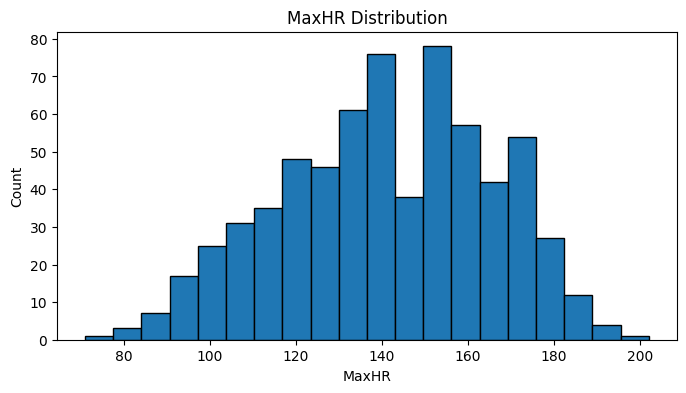

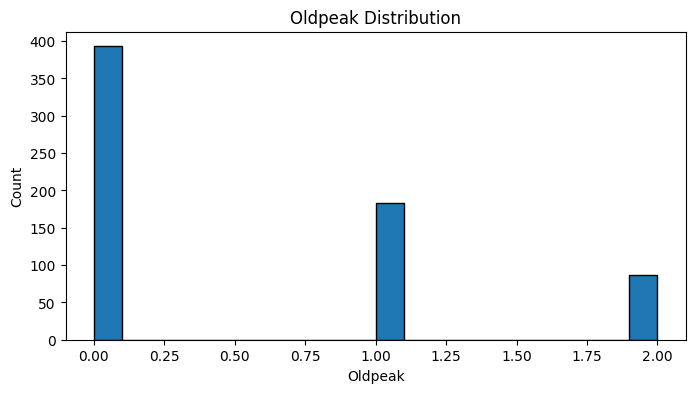

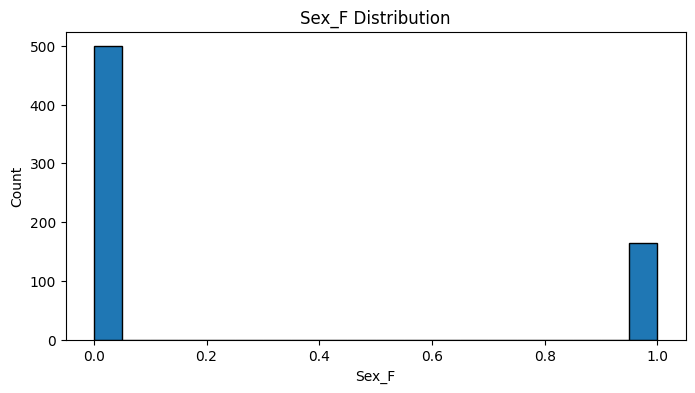

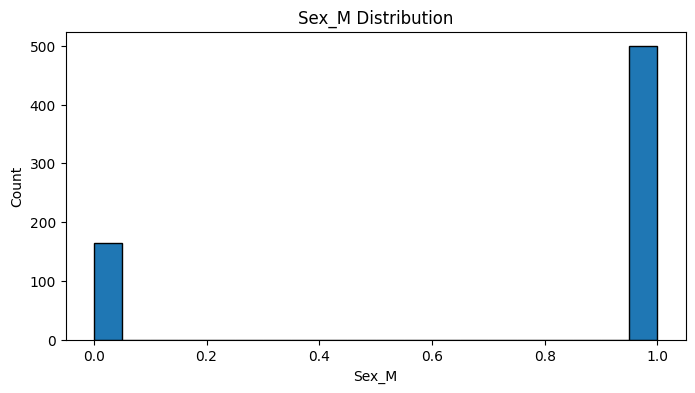

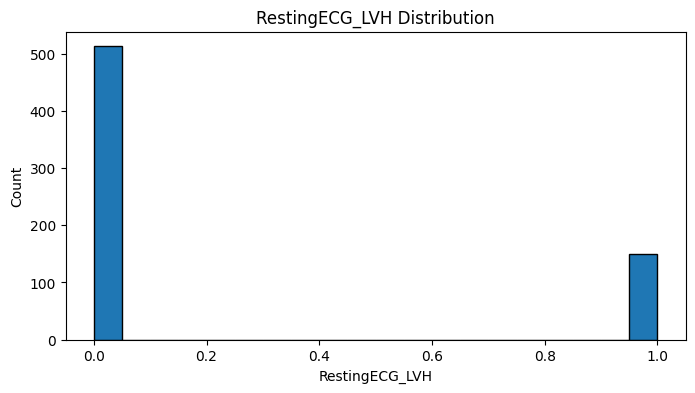

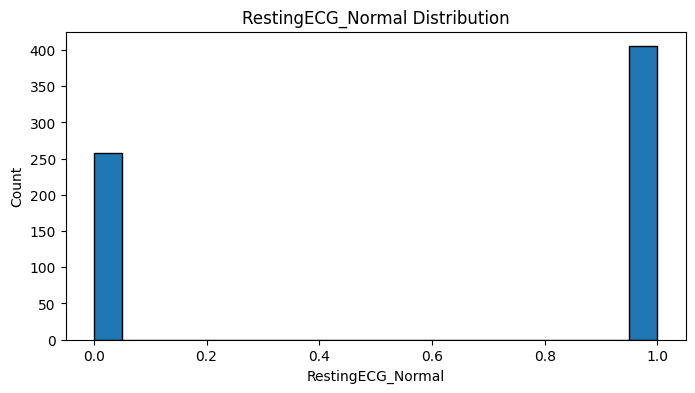

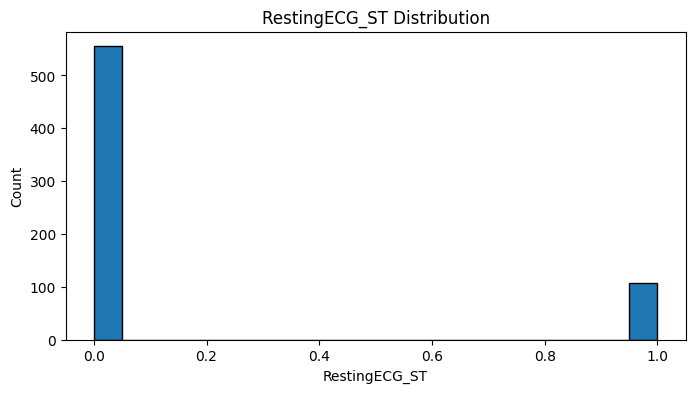

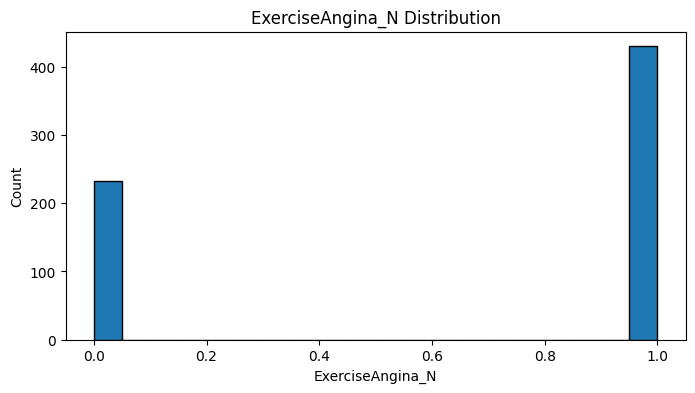

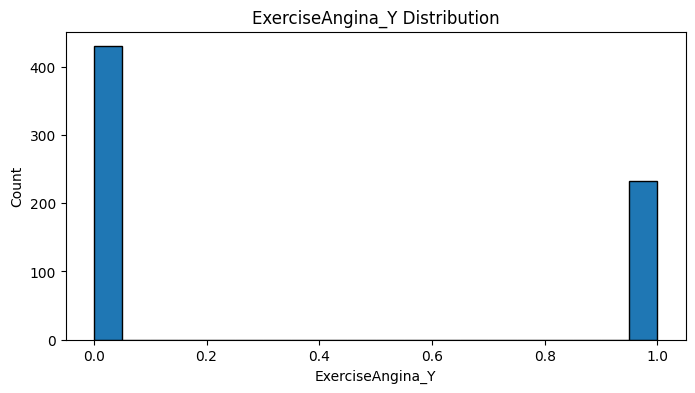

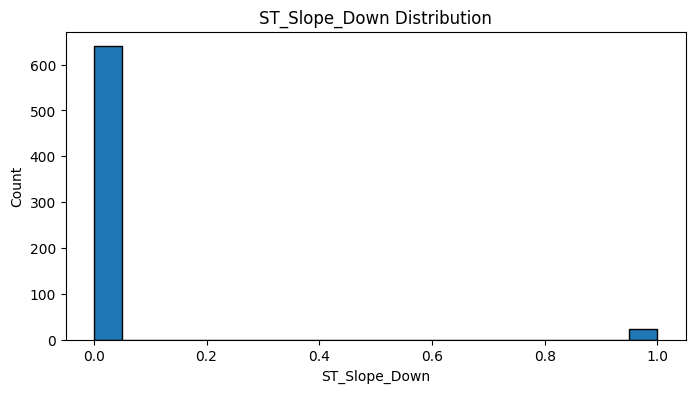

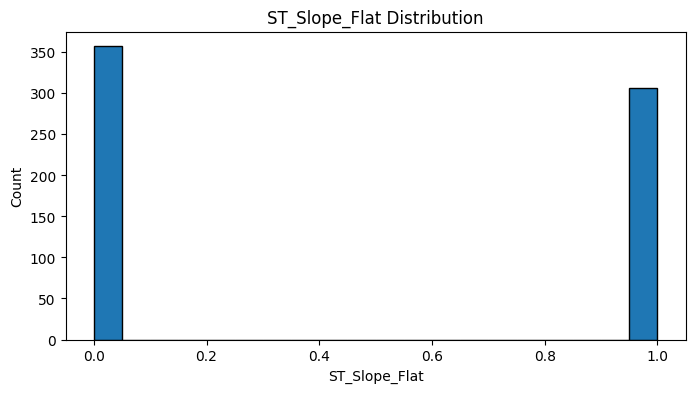

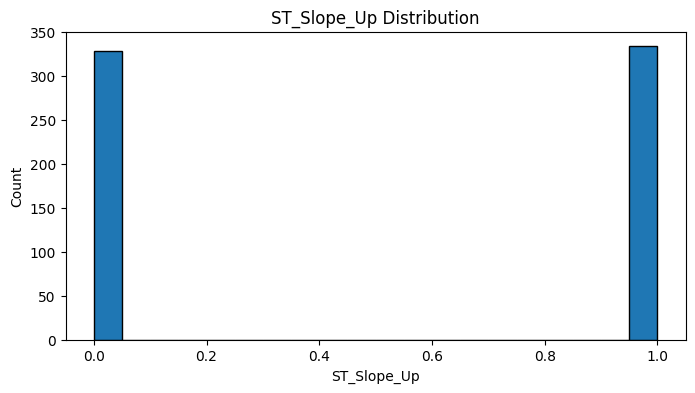

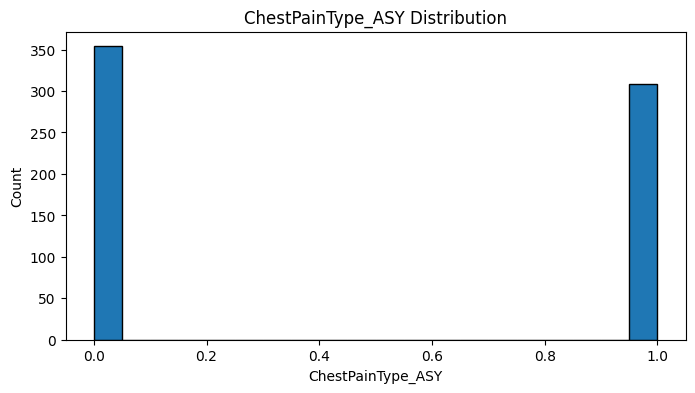

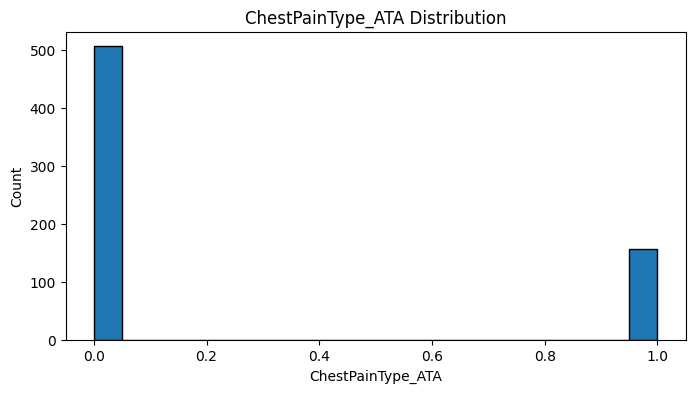

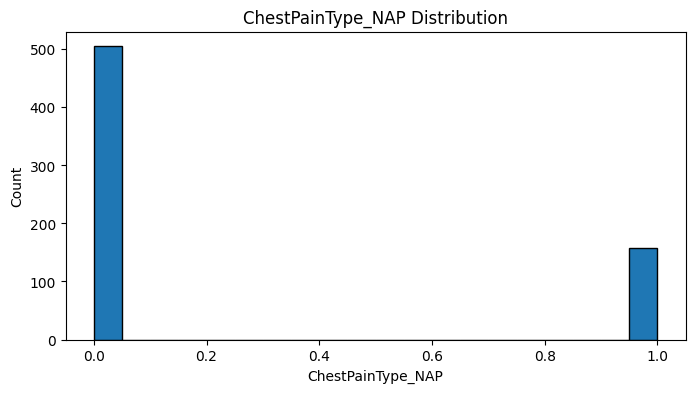

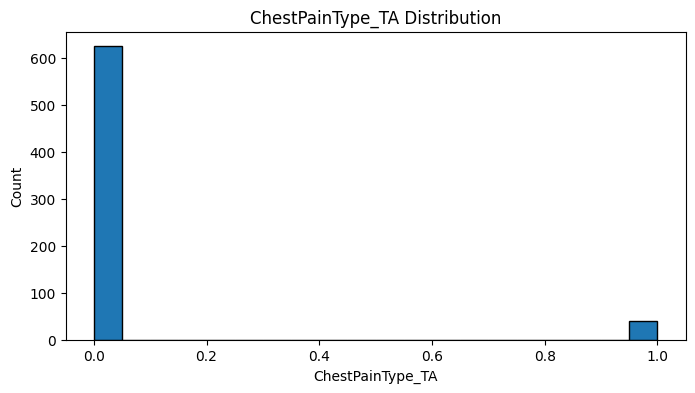

In [ ]:
for col in df_clean.columns:
    if col != 'HeartDisease':
        plt.figure(figsize=(8, 4))
        plt.title(f'{col} Distribution')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.hist(df_clean[col], bins=20, edgecolor='k')
        plt.show()

In [ ]:
df_clean.HeartDisease.value_counts()

0    372
1    291
Name: HeartDisease, dtype: int64

0    372
1    291
Name: HeartDisease, dtype: int64


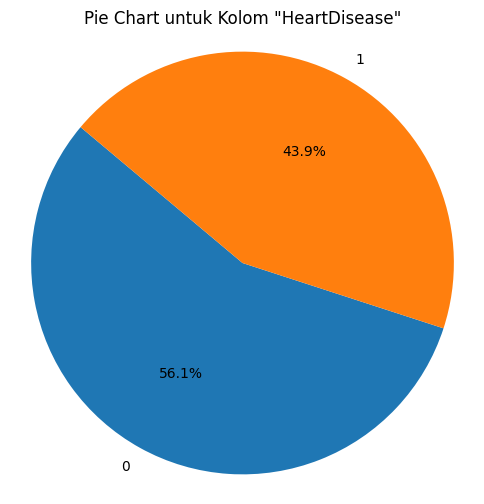

In [ ]:
HeartDisease_counts = df_clean['HeartDisease'].value_counts()
print(HeartDisease_counts)
plt.figure(figsize=(6, 6))
plt.pie(HeartDisease_counts, labels=HeartDisease_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart untuk Kolom "HeartDisease"')
plt.axis('equal')
plt.show()

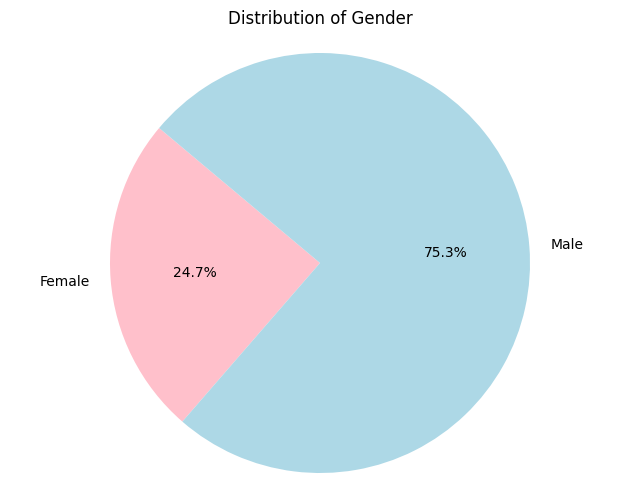

In [ ]:
# Hitung jumlah nilai True dalam kolom boolean 'Sex_F' dan 'Sex_M'
sex_counts = [df_clean['Sex_F'].sum(), df_clean['Sex_M'].sum()]

# Label untuk setiap bagian di pie chart
labels = ['Female', 'Male']

# Warna untuk setiap bagian di pie chart
colors = ['pink', 'lightblue']

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(sex_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Gender')
plt.show()


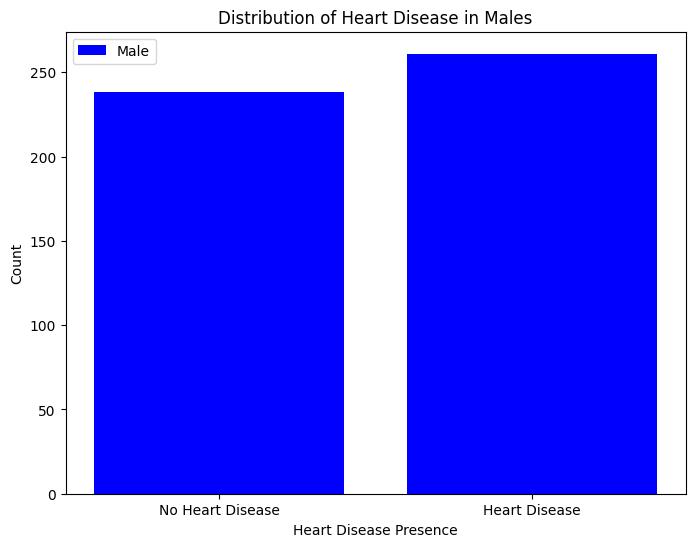

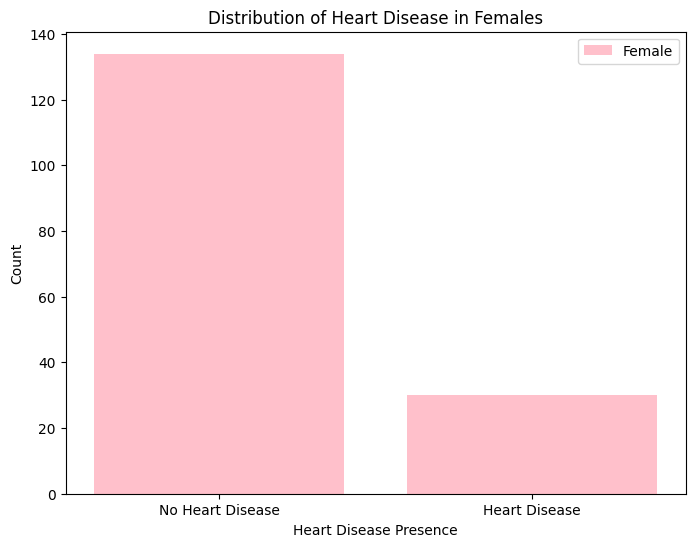

In [ ]:
# Hitung jumlah pria dan wanita dengan dan tanpa penyakit jantung
male_heart_disease = df_clean[df_clean['Sex_M'] == 1]['HeartDisease'].value_counts().sort_index()
female_heart_disease = df_clean[df_clean['Sex_F'] == 1]['HeartDisease'].value_counts().sort_index()

# Mengatur label pada sumbu x
x_labels = ['No Heart Disease', 'Heart Disease']

# Plot bar chart untuk pria
plt.figure(figsize=(8, 6))
plt.bar(x_labels, male_heart_disease, label='Male', color='blue')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease in Males')
plt.legend()
plt.show()

# Plot bar chart untuk wanita
plt.figure(figsize=(8, 6))
plt.bar(x_labels, female_heart_disease, label='Female', color='pink')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease in Females')
plt.legend()
plt.show()


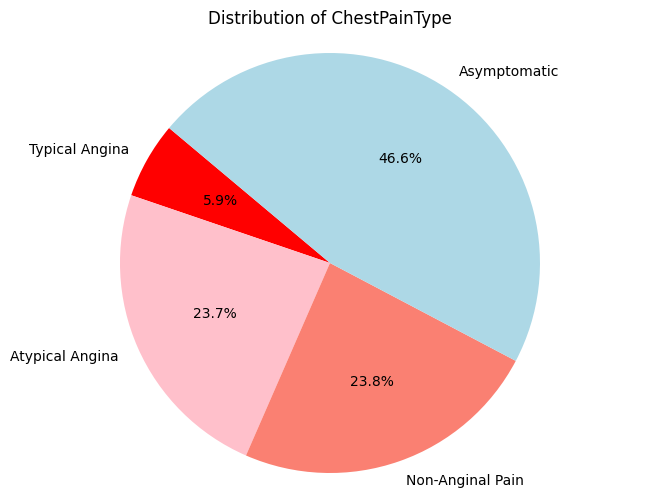

In [ ]:
ChestPainType_counts = [df_clean['ChestPainType_TA'].sum(), df_clean['ChestPainType_ATA'].sum(), df_clean['ChestPainType_NAP'].sum(), df_clean['ChestPainType_ASY'].sum()]

# Label untuk setiap bagian di pie chart
labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic']

# Warna untuk setiap bagian di pie chart
colors = ['red', 'pink', 'salmon', 'lightblue']

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(ChestPainType_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of ChestPainType')
plt.show()

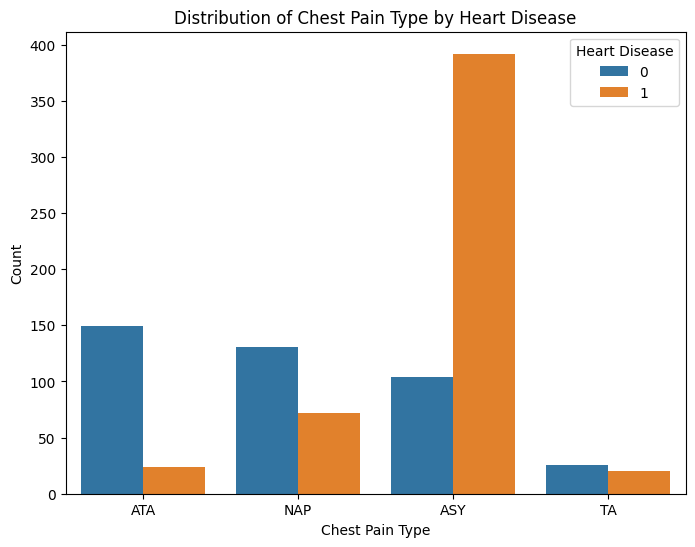

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='ChestPainType', hue='HeartDisease')
plt.title('Distribution of Chest Pain Type by Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

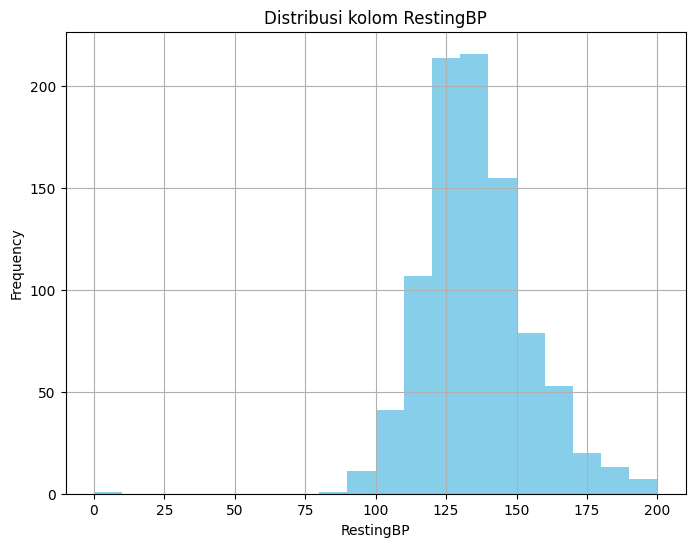

In [ ]:
##Distribusi Kolom RestingBP
plt.figure(figsize=(8, 6))
data['RestingBP'].hist(bins=20, color='skyblue')
plt.xlabel('RestingBP')
plt.ylabel('Frequency')
plt.title('Distribusi kolom RestingBP')
plt.show()

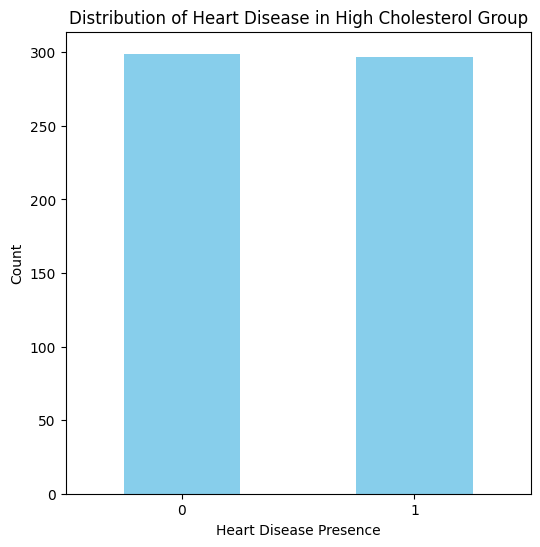

In [ ]:
# Filter data berdasarkan kondisi tertentu (misalnya, orang yang memiliki kolesterol di atas 200)
high_cholesterol = data[data['Cholesterol'] > 200]

# Hitung distribusi orang dengan heart disease pada kelompok kolesterol tinggi
heart_disease_distribution = high_cholesterol['HeartDisease'].value_counts()

# Buat bar plot
plt.figure(figsize=(6, 6))
heart_disease_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease in High Cholesterol Group')
plt.xticks(rotation=0)
plt.show()

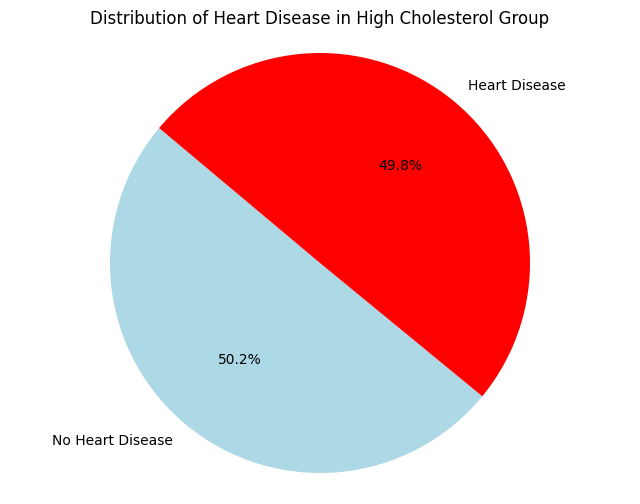

In [ ]:
# Filter data berdasarkan kondisi tertentu (misalnya, orang yang memiliki kolesterol di atas 200)
high_cholesterol = data[data['Cholesterol'] > 200]

# Hitung distribusi orang dengan heart disease pada kelompok kolesterol tinggi
heart_disease_distribution = high_cholesterol['HeartDisease'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
labels = ['No Heart Disease', 'Heart Disease']
colors = ['lightblue', 'red']
plt.pie(heart_disease_distribution, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Heart Disease in High Cholesterol Group')
plt.show()


0    704
1    214
Name: FastingBS, dtype: int64


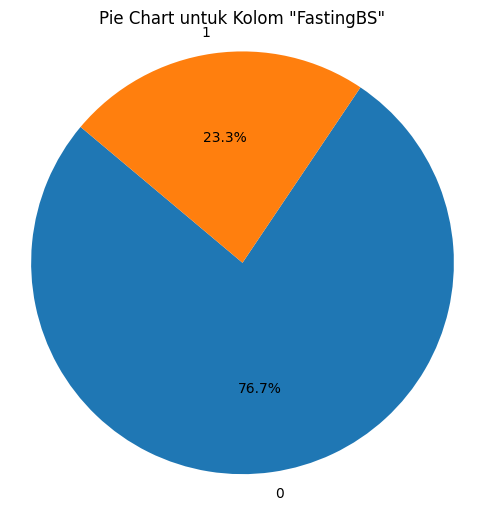

In [ ]:
FastingBS_counts = data.FastingBS.value_counts()
print(FastingBS_counts)
plt.figure(figsize=(6, 6))
plt.pie(FastingBS_counts, labels=FastingBS_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart untuk Kolom "FastingBS"')
plt.axis('equal')
plt.show()

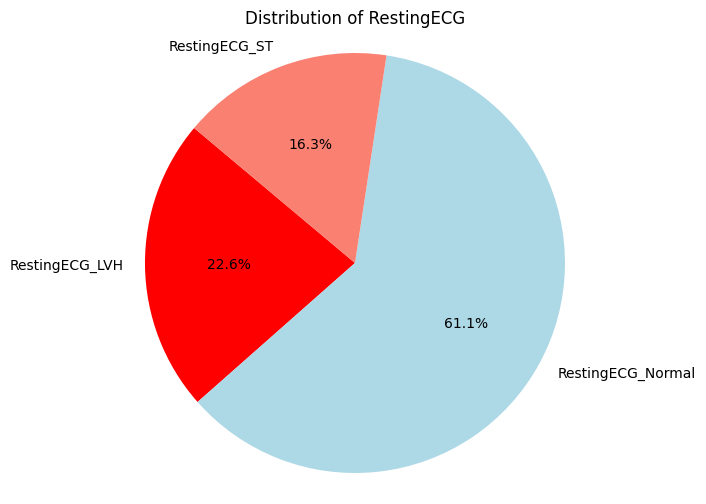

In [ ]:
RestingECG_counts = [df_clean['RestingECG_LVH'].sum(), df_clean['RestingECG_Normal'].sum(), df_clean['RestingECG_ST'].sum()]

# Label untuk setiap bagian di pie chart
labels = ['RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST']

# Warna untuk setiap bagian di pie chart
colors = ['red', 'lightblue', 'salmon']

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(RestingECG_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of RestingECG')
plt.show()

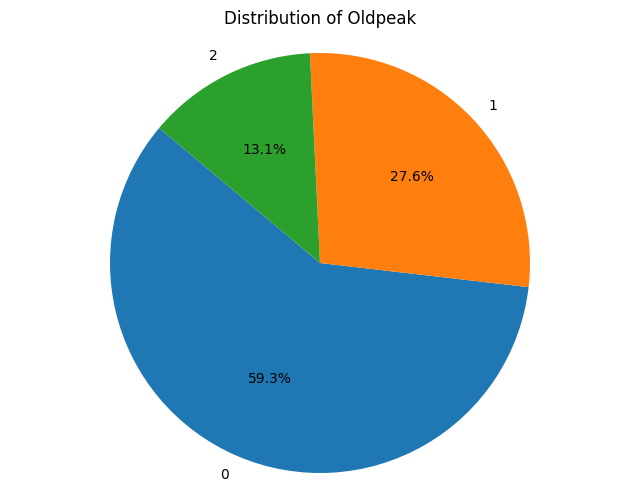

In [ ]:
Oldpeak_counts = df_clean['Oldpeak'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(Oldpeak_counts, labels=Oldpeak_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Oldpeak')
plt.show()

In [ ]:
# Assuming your target column is named 'target'
X = df_clean.drop('HeartDisease', axis=1) #feature untuk dimasukkan ke model semua variabel
y = df_clean['HeartDisease'] # target

In [ ]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,54,140,289,0,172,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0
2,37,130,283,0,98,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
3,48,138,214,0,108,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,140,241,0,123,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0
913,45,110,264,0,132,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1
915,57,130,131,0,115,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
916,57,130,236,0,174,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
912    1
913    1
915    1
916    1
917    0
Name: HeartDisease, Length: 663, dtype: int64

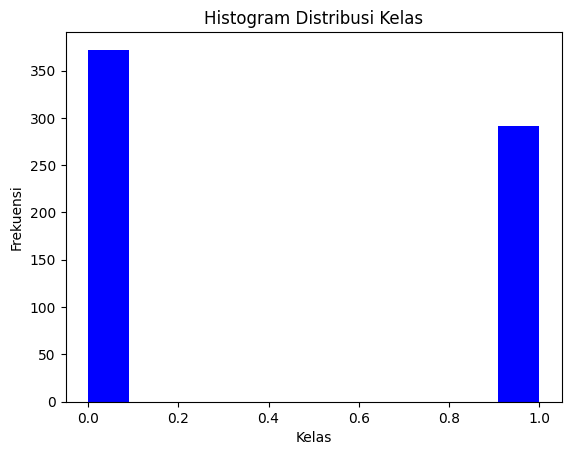

In [ ]:
plt.hist(y, bins='auto', color='blue')  # 'auto' menyesuaikan jumlah bins secara otomatis
plt.xlabel('Kelas')
plt.ylabel('Frekuensi')
plt.title('Histogram Distribusi Kelas')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
skala = MinMaxScaler()
X[["Age" , "MaxHR", "RestingBP","Cholesterol"]] = skala.fit_transform(X[["Age" , "MaxHR","RestingBP","Cholesterol"]])
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,0.530612,0.615385,0.639498,0,0.770992,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,0.428571,0.871795,0.297806,0,0.648855,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0
2,0.183673,0.487179,0.620690,0,0.206107,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
3,0.408163,0.589744,0.404389,0,0.282443,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0
4,0.530612,0.743590,0.344828,0,0.389313,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,0.591837,0.615385,0.489028,0,0.396947,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0
913,0.346939,0.230769,0.561129,0,0.465649,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1
915,0.591837,0.487179,0.144201,0,0.335878,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
916,0.591837,0.487179,0.473354,0,0.786260,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
np.round(X)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,1.0,1.0,1.0,0,1.0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,0.0,1.0,0.0,0,1.0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0
2,0.0,0.0,1.0,0,0.0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0
3,0.0,1.0,0.0,0,0.0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0
4,1.0,1.0,0.0,0,0.0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,1.0,1.0,0.0,0,0.0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0
913,0.0,0.0,1.0,0,0.0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1
915,1.0,0.0,0.0,0,0.0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0
916,1.0,0.0,0.0,0,1.0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [ ]:
actual = y_test  # Actual target values
# Create confusion matrices
dt_cm = confusion_matrix(actual, dt_pred)
rf_cm = confusion_matrix(actual, rf_pred)


# Convert confusion matrices to DataFrames
# penggabungan confussion matrix menjadi dataframeS
def confusion_matrix_to_dataframe(cm):
    labels = sorted(set(actual))
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    return df_cm

# Convert confusion matrices to DataFrames with labels
dt_cm_df = confusion_matrix_to_dataframe(dt_cm)
rf_cm_df = confusion_matrix_to_dataframe(rf_cm)

In [ ]:
dt_cm_df

Predicted,0,1
Actual,,
0,94,25
1,17,63


In [ ]:
rf_cm_df

Predicted,0,1
Actual,,
0,110,9
1,9,71


In [ ]:
def evaluate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, accuracy, precision, recall, f1


# Evaluate Decision Tree
dt_cm, dt_accuracy, dt_precision, dt_recall, dt_f1 = evaluate(y_test, dt_pred)

# Evaluate Random Forest
rf_cm, rf_accuracy, rf_precision, rf_recall, rf_f1 = evaluate(y_test, rf_pred)

In [ ]:
metrik = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Confusion Matrix': [dt_cm, rf_cm],
    'Accuracy': [dt_accuracy, rf_accuracy],
    'Precision': [dt_precision, rf_precision],
    'Recall': [dt_recall, rf_recall],
    'F1-Score': [dt_f1, rf_f1]
}

# Buat DataFrame
df_evaluation = pd.DataFrame(metrik)
print(df_evaluation)

           Model      Confusion Matrix  Accuracy  Precision    Recall  \
0  Decision Tree  [[94, 25], [17, 63]]  0.788945   0.794209  0.788945   
1  Random Forest   [[110, 9], [9, 71]]  0.909548   0.909548  0.909548   

   F1-Score  
0  0.790299  
1  0.909548  


In [ ]:
from IPython.display import display
# Melatih model dengan data training
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Membuat prediksi menggunakan model yang sudah dilatih dengan data testing (X_test)
dt_predictions = dt.predict(X_test)
rf_predictions = rf.predict(X_test)

# Membuat DataFrame untuk hasil prediksi
predictions_df = pd.DataFrame({
    'DT_Predictions': dt_predictions,
    'RF_Predictions': rf_predictions
})
# Menggabungkan hasil prediksi dengan data testing (X_test)
combined_data = pd.concat([X_test.reset_index(drop=True), predictions_df], axis=1)
combined_data_df = pd.DataFrame(combined_data)
display(combined_data_df)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,RestingECG_LVH,RestingECG_Normal,...,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,DT_Predictions,RF_Predictions
0,0.714286,0.230769,0.523511,0,0.526718,2,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
1,0.734694,0.423077,0.702194,0,0.458015,1,0,1,0,1,...,1,0,1,0,0,0,1,0,1,1
2,0.285714,0.615385,0.442006,0,0.816794,0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,0.571429,0.576923,0.617555,1,0.419847,1,0,1,0,1,...,1,0,1,0,1,0,0,0,1,1
4,0.510204,0.487179,0.304075,0,0.587786,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.530612,0.487179,0.366771,1,0.312977,2,0,1,0,1,...,1,0,1,0,1,0,0,0,1,1
195,0.612245,0.256410,0.454545,0,0.717557,2,0,1,1,0,...,0,0,1,0,0,0,1,0,0,0
196,0.306122,0.358974,0.645768,0,0.641221,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,1
197,0.163265,0.487179,0.388715,0,0.816794,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
# Melatih model dengan data training
dt.fit(X_train, y_train)

# Mendapatkan feature importance
feature_importance = dt.feature_importances_

# Mengatur nama fitur sebagai index dan nilai feature importance sebagai kolom
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Menampilkan feature importance dalam urutan menurun
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

              Feature  Importance
15        ST_Slope_Up    0.353557
4               MaxHR    0.139510
1           RestingBP    0.113127
16  ChestPainType_ASY    0.078797
6               Sex_F    0.075721
0                 Age    0.068814
2         Cholesterol    0.058379
11   ExerciseAngina_N    0.033891
12   ExerciseAngina_Y    0.018362
8      RestingECG_LVH    0.017216
18  ChestPainType_NAP    0.014765
5             Oldpeak    0.012362
3           FastingBS    0.007011
19   ChestPainType_TA    0.006954
10      RestingECG_ST    0.001534
14      ST_Slope_Flat    0.000000
13      ST_Slope_Down    0.000000
9   RestingECG_Normal    0.000000
17  ChestPainType_ATA    0.000000
7               Sex_M    0.000000


In [ ]:
# Melatih model dengan data training
dt.fit(X_train, y_train)

# Mendapatkan feature importance
rf_feature_importance = rf.feature_importances_
feature_names = X.columns

# Mengatur nama fitur sebagai index dan nilai feature importance sebagai kolom
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_feature_importance})

# Menampilkan feature importance dalam urutan menurun
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df

,Feature,Importance
15,ST_Slope_Up,0.132168
4,MaxHR,0.117378
14,ST_Slope_Flat,0.092739
16,ChestPainType_ASY,0.084973
12,ExerciseAngina_Y,0.081359
0,Age,0.080813
2,Cholesterol,0.076381
1,RestingBP,0.076236
11,ExerciseAngina_N,0.056984
5,Oldpeak,0.043619


In [ ]:
# Membuat data acak
np.random.seed(42)  # Untuk hasil yang konsisten
n_samples = 1000
n_features = 10
X = np.random.rand(n_samples, n_features)  # Contoh data fitur acak
y = np.random.randint(0, 2, size=n_samples)  # Contoh label acak (kelas biner)

# Inisialisasi model Random Forest
rf = RandomForestClassifier()

# Melatih model dengan data acak
rf.fit(X, y)

# Prediksi dengan data acak (bisa menggunakan data yang sama atau data baru)
predictions = rf.predict(X)

# Menampilkan hasil prediksi
predictions_df = pd.DataFrame({
    'Predictions': predictions,
    'Actual': y
})
print(predictions_df)

     Predictions  Actual
0              0       0
1              1       1
2              1       1
3              1       1
4              0       0
..           ...     ...
995            1       1
996            1       1
997            0       0
998            0       0
999            1       1

[1000 rows x 2 columns]
